<a href="https://colab.research.google.com/github/jackgrebenc/LinearRegression/blob/main/LinearRegression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

##Titanic Survival Prediction
In this project, a multiple linear regression will be used to predict the survival rate based on a dataset about each Titanic passenger. This is a common example problem and has been used as a challenge problem on Kaggle (https://www.kaggle.com/c/titanic/data).

This project differs from others in that it will only use numpy and pandas and not will nt utilize Tensorflow or any other machine learning library that handles the details of this. The linear regression and errors will be computed directly without external libraries.

To summarize the results, this method gave 77% accuracy on the evaluation set.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt


In [2]:
#1) Load dataset.
dftrain = pd.read_csv('https://storage.googleapis.com/tf-datasets/titanic/train.csv') # training data
dfeval = pd.read_csv('https://storage.googleapis.com/tf-datasets/titanic/eval.csv') # testing data

#2) Prepare data 
#2.1 Turn text features into numeric features where possible using a mapping
sexMap = {"male":0, "female":1}
classMap = {"First":1, "Second":2, "Third":3}
aloneMap = {"n":0, "y":1}

dftrain.sex = [sexMap.get(item, item) for item in dftrain.sex]
dftrain["class"] = [classMap.get(item, item) for item in dftrain["class"]]
dftrain["alone"] = [aloneMap.get(item, item) for item in dftrain["alone"]]
dfeval.sex = [sexMap.get(item, item) for item in dfeval.sex]
dfeval["class"] = [classMap.get(item, item) for item in dfeval["class"]]
dfeval["alone"] = [aloneMap.get(item, item) for item in dfeval["alone"]]

#2.2 Take only the relevant features to be used in Linear Regression
dftrain = dftrain[["survived","sex", "age", "n_siblings_spouses", "parch", "fare", "class", "alone"]].copy()
dfeval = dfeval[["survived","sex", "age", "n_siblings_spouses", "parch", "fare", "class", "alone"]].copy()
dftrain.dropna()
dfeval.dropna()
#Note -> dftrain and dfeval.isna().sum() is zero for all columns; this is more for safety
#Now that we have our data boiled down, lets pop off the remaining response variables
y_train = dftrain.pop('survived')
y_eval = dfeval.pop('survived')

In [3]:
#3) Define matrices that can be used to create the estimated coefficients of regression
#3.1 Add an intercept term to the data
intercept_train = np.ones(dftrain.shape[0],dtype="int32")
dftrain["intercept"] = intercept_train
intercept_eval = np.ones(dfeval.shape[0], dtype="int32")
dfeval["intercept"] = intercept_eval

#3.2 Find estimates for the coefficients of the regression
X = dftrain.values
Xt = np.transpose(dftrain.values)
# Coeffs = (X*Xt)^-1*Xt*y
coeffs = np.matmul(np.matmul(np.linalg.inv(np.matmul(Xt, X)), Xt), y_train)

#3.3 Predict probabilities of survival on evaluation data
y_pred = np.dot(dfeval,coeffs)
y_pred_rounded = y_pred
#if value >0.5 round to survived; if not round down to 0 (dead)
for i in range(0, len(y_pred_rounded)):
  if y_pred_rounded[i] < 0.5:
    y_pred_rounded[i] = 0
  else:
    y_pred_rounded[i] = 1
  
#residual square error -> In this case if prediction is incorrect, it will give a 1.
#This will make it easy to calculate the accuracy; the sum of the r vector is the number
# of incorrect predictions
r = (y_pred_rounded - y_eval)**2

#3.4 output the accuracy of the model: #success/#total datapoints
acc = (r.shape[0] - sum(r))/r.shape[0]
print(round(acc, 4)) #77% accurate model

0.7689


Text(0.5, 1.0, 'Selection of Prediction Threshold Effects on Accuracy')

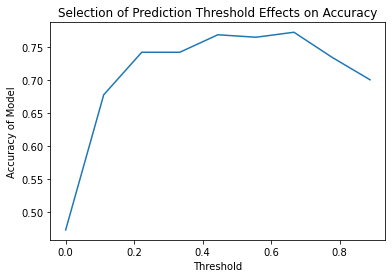

In [4]:
#4) - See how different thresholds perform
#It's expected that 0.5 is optimal, which was chosen above
#Let's see what happens if the threshold value of 0.5 is changed
accPoint = np.zeros(9)
x_axis = np.linspace(0,1,9,endpoint=False)
for i in range(1,10):
  a = i/10
  y_pred_rounded = np.dot(dfeval,coeffs)
  y_p = y_pred_rounded > a
  y_p = y_p.astype(int)
  res = (y_p - y_eval)**2
  accPoint[i-1] = (res.shape[0] - sum(res))/res.shape[0]
#These results can be ploted
plt.plot(x_axis, accPoint)
plt.xlabel("Threshold")
plt.ylabel("Accuracy of Model")
plt.title("Selection of Prediction Threshold Effects on Accuracy")